In [12]:
import pandas as pd
customers_df = pd.read_csv("income.CSV")

In [13]:
customers_df.head(5)

,age,income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


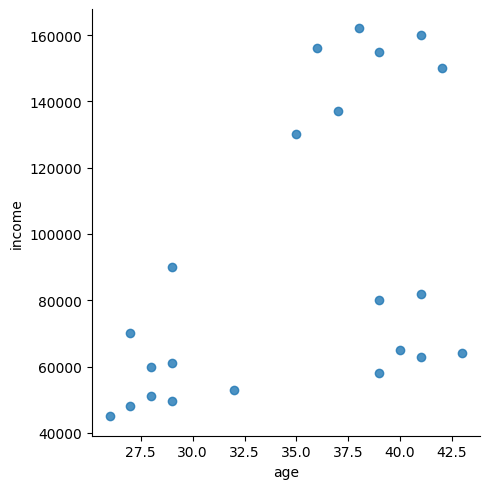

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
sn.lmplot(data=customers_df, x="age", y="income",fit_reg = False);

In [15]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(customers_df)

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

The output variable clusters.labels_ contains labels that identify the cluster to which an observation belongs. We can concatenate it with the customers’ data and verify.

In [16]:
customers_df["clusterid"] = clusters.labels_

In [17]:
customers_df[0:5]

,age,income,clusterid
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


Plotting Customers with Their Segments

In [18]:
# markers = ['+','^','.']
# sn.lmplot(  x="age",y="income",
#             data = customers_df,
#             hue = "clusterid",
#             fit_reg = False,
#             markers = markers
#             );

The above clusters are mostly segmented based on income. This is because the salary is on a larger scale
compared to the age. The scale of age is 26 to 43, while salary ranges from 45000 to 162000. For example, difference
in age between two customers, with age 26 and 43, is significant, but numerical difference is only
17. Similarly, difference in income between two customers, with income of 51000 and 53000, is not significant; but
the numerical difference is 2000. 
So, the distance will always be determined by the difference in salary and not in age. Hence before creating clusters, all features need to be normalized and brought to normalized scale. StandardScaler in skleardn.preprocessing normalizes all values by subtracting all values from its mean and dividing by standard deviation

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age","income"]])
scaled_customers_df[0:5]

array([[-1.35605536, -0.48068427],
       [-1.00915747, -0.01015907],
       [-1.00915747, -0.69242061],
       [-1.18260641, -0.71594687],
       [ 1.24567876,  1.40141653]])

create the clusters again using normalized feature set.

In [21]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_customers_df)
customers_df["clusterid_new"] = clusters_new.labels_

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
customers_df[0:5]

,age,income,clusterid,clusterid_new
0,27,70000,2,1
1,29,90000,2,1
2,29,61000,0,1
3,28,60000,0,1
4,42,150000,1,0


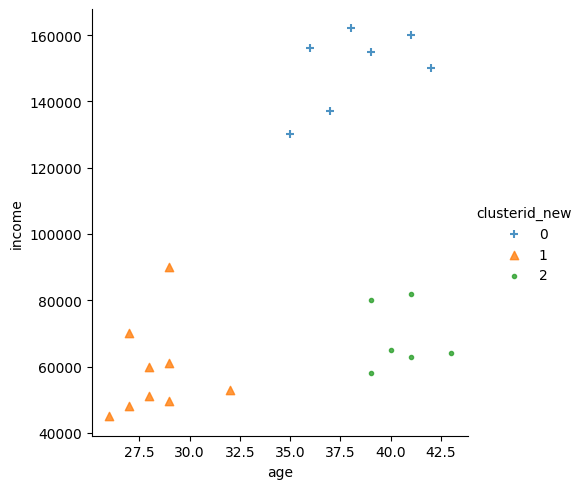

In [26]:
markers = ['+','^','.']
sn.lmplot(x="age", y="income",
            data = customers_df,
            hue = "clusterid_new",
            fit_reg = False,
            markers = markers
            );

In [ ]:
clusters.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

Cluster Centers and Interpreting the Clusters:
Each cluster is defined by its cluster center. The cluster center explains the characteristic of the cluster
and helps us to interpret the cluster. 
For example, in this example of customer segmentation, the cluster center provides the average age and average income of each cluster. Of course, the customer’s age and income will vary from the cluster centers and is called the cluster variance.

In [ ]:
customers_df.groupby('clusterid')['age','income'].agg(['mean','std']).reset_index()

C:\Users\hp\AppData\Local\Temp\ipykernel_14992\1111317360.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customers_df.groupby('clusterid')['age','income'].agg(['mean','std']).reset_index()


clusterid        age                   income              
                  mean       std           mean           std
0         0  38.285714  2.563480  150000.000000  12069.244660
1         1  34.000000  7.023769   80500.000000   8225.975120
2         2  32.909091  6.456850   56136.363636   7071.389217

The clusters can be interpreted as follows:
1. cluster0: Customers with mean age of 38 and income of 150k. High age and high income.
2. cluster1: Customers with mean age of 34 and income of 80.5K. Mid age and mid income.
3. cluster2: Customers with mean age of 32 and income of 56.1k. Low age and low income.